In [5]:
import pandas as pd

In [6]:
wapo= pd.read_csv('/home/vizziwo/capcookie/data/processed/fatalwrangling.csv', index_col=0)

In [7]:
wapo.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
4895,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
4896,5928,Terron Jammal Boone,2020-06-17,shot,gun,31.0,M,B,Rosamond,CA,False,attack,Not fleeing,False
4897,5930,TK TK,2020-06-18,shot,gun,38.0,M,W,Westminister,CO,False,other,Not fleeing,False
4898,5933,Andres Guardado,2020-06-18,shot,gun,18.0,M,H,Gardena,CA,False,other,Foot,False
4899,5941,Cody W. Cook,2020-06-19,shot,gun,24.0,M,W,Sodus,NY,False,attack,Not fleeing,True


# Deleted People Armed with Both Gun AND Vehicle
## I couldn't decide how to categorize them and there were relatively few

In [8]:
wapo[wapo['armed']=='gun and vehicle']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3410,3990,Fabian Ortiz Adame,2018-08-27,shot,gun and vehicle,25.0,M,W,Phoenix,AZ,False,attack,Car,False
3689,4374,Geoffrey Morris,2019-01-10,shot,gun and vehicle,29.0,M,W,Wichita,KS,False,attack,Car,False
4183,4934,Jose Mendez,2019-08-09,shot,gun and vehicle,37.0,M,H,Kansas City,MO,False,attack,Foot,False
4214,5002,Rene Enrique Ruiz,2019-08-30,shot,gun and vehicle,51.0,M,H,Tolleson,AZ,False,attack,Other,False
4314,5476,Cameron Bennett,2019-10-17,shot,gun and vehicle,22.0,M,B,Fayette,MS,False,attack,Car,False
4318,5219,Terry Countryman,2019-10-19,shot,gun and vehicle,34.0,M,W,Palestine,TX,False,attack,Other,False
4415,5485,Nicholas Cantelmi,2019-11-28,shot,gun and vehicle,31.0,M,W,Jim Thorpe,PA,False,attack,Other,False
4424,5233,Yemerson Melendez,2019-12-01,shot,gun and vehicle,16.0,M,H,Fort Pierce,FL,False,attack,Other,False
4491,5317,Richard Ruiz,2019-12-23,shot,gun and vehicle,38.0,M,H,Phoenix,AZ,False,attack,Car,False
4737,5704,Austin Hines,2020-04-01,shot,gun and vehicle,19.0,M,W,Columbus,MS,False,attack,Car,False


In [9]:
gunand = wapo[(wapo['armed']=='gun and vehicle')]

In [10]:
wapo = wapo.drop(index = gunand.index)

# Grouped Together Everything with Nontraditional Weapon

In [11]:
wapo[wapo['armed'].str.contains('gun|vehicle|knife|unarmed|unknown|undetermined')==False].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False
16,32,James Dudley Barker,2015-01-08,shot,shovel,42.0,M,W,Salt Lake City,UT,False,attack,Not fleeing,True
50,99,Tiano Meton,2015-01-22,shot,toy weapon,25.0,M,B,Sierra Blanca,TX,False,attack,Car,False
69,346,Matautu Nuu,2015-01-28,shot and Tasered,hammer,35.0,M,A,Stockton,CA,True,attack,Not fleeing,False


# One-Hot Encoded the Different Kinds of Arms, including "Non-traditional Weapon"

In [12]:
wapo['armed_gun'] = wapo['armed'].str.contains('gun') == 1
wapo['armed_vehicle'] = wapo['armed'].str.contains('vehicle') == 1
wapo['armed_knife'] = wapo['armed'].str.contains('knife') == 1
wapo['armed_unknown'] = (wapo.armed.str.contains('unknown|undetermined')) == 1
wapo['unarmed'] = wapo.armed.str.contains('unarmed') == 1
wapo['untraditional_weapon'] = (wapo['armed'].str.contains('gun|vehicle|knife|unarmed|unknown|undetermined')==False) ==1

In [13]:
wapo.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True,False,False,False,False,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True,False,False,False,False,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,False,False,False,False,True,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,False,False,False,False,False,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True,False,False,False,False,False


In [14]:
wapo = wapo.dropna()

In [15]:
wapo = wapo.drop(columns = ['id','name','date','city','state'])

In [16]:
wapo.columns

Index(['manner_of_death', 'armed', 'age', 'gender', 'race',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera',
       'armed_gun', 'armed_vehicle', 'armed_knife', 'armed_unknown', 'unarmed',
       'untraditional_weapon'],
      dtype='object')

In [17]:
wapo.race.value_counts()

W    2474
B    1297
H     900
A      93
N      78
O      48
Name: race, dtype: int64

# One-Hot Encoded "Blackness" of each entry (Are they black or not?)
## Also encoded gender, manner of death, threat level and if they fleed

In [18]:
wapo['blackornot'] = wapo['race'].str.contains('B')
other = wapo.loc[:,['gender','manner_of_death','threat_level','flee']]
w = pd.concat((wapo, pd.get_dummies(other)), axis=1)


In [19]:
cols = ['gender','manner_of_death','armed','threat_level','flee','race']
w = w.drop(columns = cols)

In [20]:
pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 999
list(w.columns)

['age',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'blackornot',
 'gender_F',
 'gender_M',
 'gender_Nonbinary',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']

In [21]:
w.head()

,age,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackornot,...,gender_Nonbinary,manner_of_death_shot,manner_of_death_shot and Tasered,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
0,53.0,True,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0
1,47.0,False,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0
2,23.0,False,False,False,False,False,False,True,False,False,...,0,0,1,0,1,0,0,0,1,0
3,32.0,True,False,False,False,False,False,False,True,False,...,0,1,0,1,0,0,0,0,1,0
4,39.0,False,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0


# MODEL 1, blackornot first try

In [22]:
import turicreate
sf = turicreate.SFrame(w)

In [23]:
feats = ['age',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'gender_F',
 'gender_M',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']

In [24]:
train_data,test_data = sf.random_split(.8,seed=0)
race_model = turicreate.logistic_classifier.create(train_data,target='blackornot', features=feats, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 3934

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 20

Number of coefficients      : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.031716     | 0.733859          | 0.746862            |

| 2         | 3        | 1.044447     | 0.735892          | 0.751046            |

| 3         | 4        | 1.057096     | 0.735384          | 0.751046            |

| 4         | 5        | 1.071526     | 0.735384          | 0.751046            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [25]:
race_model.evaluate

<bound method LogisticClassifier.evaluate of Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 21
Number of examples             : 3934
Number of classes              : 2
Number of feature columns      : 20
Number of unpacked features    : 20

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 4
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0765

Settings
--------
Log-likelihood                 : 2140.5858

Highest Positive Coefficients
-----------------------------
gender_M                       : 1.7416
gender_F                       : 1.5259
body_camera                    : 0.4746
flee_Foot                      : 0.3525
manner_of_death_shot and Tasered : 0.2042

Lowest Negative Coefficients
----------------------------

In [26]:
race_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 248 | 708 |
 |   1e-05   | 1.0 | 1.0 | 248 | 708 |
 |   2e-05   | 1.0 | 1.0 | 248 | 708 |
 |   3e-05   | 1.0 | 1.0 | 248 | 708 |
 |   4e-05   | 1.0 | 1.0 | 248 | 708 |
 |   5e-05   | 1.0 | 1.0 | 248 | 708 |
 |   6e-05   | 1.0 | 1.0 | 248 | 708 |
 |   7e-05   | 1.0 | 1.0 | 248 | 708 |
 |   8e-05   | 1.0 | 1.0 | 248 | 708 |
 |   9e-05   | 1.0 | 1.0 | 248 | 708 |
 +-----------+-----+-----+-----+-----+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.}

In [27]:
wapo['predicted_black'] = race_model.predict(sf, output_type = 'probability')

In [28]:
wapo

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackornot,predicted_black
0,shot,gun,53.0,M,A,True,attack,Not fleeing,False,True,False,False,False,False,False,False,0.107781
1,shot,gun,47.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False,0.227499
2,shot and Tasered,unarmed,23.0,M,H,False,other,Not fleeing,False,False,False,False,False,True,False,False,0.463728
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False,False,False,False,False,False,True,False,0.143443
4,shot,nail gun,39.0,M,H,False,attack,Not fleeing,False,True,False,False,False,False,False,False,0.279239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,shot,gun,31.0,M,W,False,attack,Car,False,True,False,False,False,False,False,False,0.307768
4896,shot,gun,31.0,M,B,False,attack,Not fleeing,False,True,False,False,False,False,False,True,0.337604
4897,shot,gun,38.0,M,W,False,other,Not fleeing,False,True,False,False,False,False,False,False,0.254526
4898,shot,gun,18.0,M,H,False,other,Foot,False,True,False,False,False,False,False,False,0.491253


In [29]:
wapo.loc[:,['blackornot','predicted_black']].sort_values(by='predicted_black', ascending=False).tail(100)

,blackornot,predicted_black
4831,False,0.072805
1747,False,0.072805
4027,False,0.072083
2273,False,0.071806
4451,False,0.071806
564,False,0.071466
1706,False,0.071445
1276,False,0.071146
1083,False,0.070524
2995,False,0.070223


In [30]:
wapo.loc[:,['blackornot','predicted_black']].sort_values(by='predicted_black').tail(100)

,blackornot,predicted_black
4252,True,0.523881
1254,False,0.526095
1050,False,0.527260
1770,False,0.527260
2671,True,0.527522
964,True,0.528477
3463,False,0.528674
3322,False,0.528789
860,False,0.529916
1557,False,0.530048


# MODEL 2, Added Age-Group Columns

In [31]:
df = w
df['0_to_10'] = df.age <= 0
df['11_to_20'] = (df.age>10)&(df.age<21)
df['21_to_30'] = (df.age>20)&(df.age<31)
df['31_to_40'] = (df.age>30)&(df.age<41)
df['41_to_50'] = (df.age>40)&(df.age<51)
df['51_to_60'] = (df.age>50)&(df.age<61)
df['61_to_70'] = (df.age>60)&(df.age<71)
df['71_to_80'] = (df.age>70)&(df.age<81)
df['81_to_90'] = (df.age>80)&(df.age<91)
df=df.drop('age',axis=1)


In [32]:
feats = [
'0_to_10', 
'11_to_20',
'21_to_30', 
'31_to_40', 
'41_to_50', 
'51_to_60', 
'61_to_70', 
'71_to_80',
'81_to_90',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'gender_F',
 'gender_M',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']

In [33]:
sf2 = turicreate.SFrame(df)

In [34]:
train_data,test_data = sf2.random_split(.8,seed=0)
race_model2 = turicreate.logistic_classifier.create(train_data,target='blackornot', features=feats, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 3934

Number of classes           : 2

Number of feature columns   : 28

Number of unpacked features : 28

Number of coefficients      : 29

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.025262     | 0.734875          | 0.754184            |

| 2         | 3        | 0.045740     | 0.735384          | 0.751046            |

| 3         | 4        | 0.062819     | 0.735130          | 0.751046            |

| 4         | 5        | 0.078759     | 0.735130          | 0.751046            |

| 5         | 6        | 0.094966     | 0.735130          | 0.751046            |

| 9         | 10       | 0.167627     | 0.735130          | 0.751046            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [35]:
race_model2.evaluate

<bound method LogisticClassifier.evaluate of Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 29
Number of examples             : 3934
Number of classes              : 2
Number of feature columns      : 28
Number of unpacked features    : 28

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 9
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.1716

Settings
--------
Log-likelihood                 : 2138.4831

Highest Positive Coefficients
-----------------------------
11_to_20                       : 3.571
21_to_30                       : 3.2756
31_to_40                       : 2.936
41_to_50                       : 2.5923
61_to_70                       : 2.507

Lowest Negative Coefficients
----------------------------
81_t

In [36]:
race_model2.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-----+-----+
 | threshold |        fpr         | tpr |  p  |  n  |
 +-----------+--------------------+-----+-----+-----+
 |    0.0    |        1.0         | 1.0 | 248 | 708 |
 |   1e-05   |        1.0         | 1.0 | 248 | 708 |
 |   2e-05   | 0.998587570621469  | 1.0 | 248 | 708 |
 |   3e-05   | 0.998587570621469  | 1.0 | 248 | 708 |
 |   4e-05   | 0.9971751412429378 | 1.0 | 248 | 708 |
 |   5e-05   | 0.9971751412429378 | 1.0 | 248 | 708 |
 |   6e-05   | 0.9971751412429378 | 1.0 | 248 | 708 |
 |   7e-05   | 0.9971751412429378 | 1.0 | 248 | 708 |
 |   8e-05   | 0.9971751412429378 | 1.0 | 248 | 708 |
 |   9e-05   | 0.9971751412429378 | 1.0 | 248 | 708 |
 +-----------+--------------------+-----+-----+-----+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more

### The Training Acurracy is slightly higher and the Testing accuracy is slightly lower

# MODEL3,  Remove entries who are Asians/ Nat Ams/ Hispanics / Other, 
## NO Age Groups Cols

In [37]:
wapo.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackornot,predicted_black
0,shot,gun,53.0,M,A,True,attack,Not fleeing,False,True,False,False,False,False,False,False,0.107781
1,shot,gun,47.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False,0.227499
2,shot and Tasered,unarmed,23.0,M,H,False,other,Not fleeing,False,False,False,False,False,True,False,False,0.463728
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False,False,False,False,False,False,True,False,0.143443
4,shot,nail gun,39.0,M,H,False,attack,Not fleeing,False,True,False,False,False,False,False,False,0.279239


In [38]:
mask = wapo['race'].str.contains('A|O|N|H')
wapo2 = wapo[~mask]
wapo2.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackornot,predicted_black
1,shot,gun,47.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False,0.227499
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False,False,False,False,False,False,True,False,0.143443
5,shot,gun,18.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False,0.443163
7,shot,gun,35.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False,0.307653
8,shot,unarmed,34.0,F,W,False,other,Not fleeing,True,False,False,False,False,True,False,False,0.382562


In [39]:
wapo2['blackornot'] = wapo2['race'].str.contains('B')
other = wapo2.loc[:,['gender','manner_of_death','threat_level','flee']]
w2 = pd.concat((wapo2, pd.get_dummies(other)), axis=1)
cols = ['gender','manner_of_death','armed','threat_level','flee','race']
w2 = w2.drop(columns = cols)
w2.head()

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackornot,...,gender_Nonbinary,manner_of_death_shot,manner_of_death_shot and Tasered,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
1,47.0,False,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0
3,32.0,True,False,False,False,False,False,False,True,False,...,0,1,0,1,0,0,0,0,1,0
5,18.0,False,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0
7,35.0,False,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0
8,34.0,False,True,False,False,False,False,True,False,False,...,0,1,0,0,1,0,0,0,1,0


In [40]:
feats = ['age',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'gender_F',
 'gender_M',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']

sf = turicreate.SFrame(w2)
train_data,test_data = sf.random_split(.8,seed=0)
race_model3 = turicreate.logistic_classifier.create(train_data,target='blackornot', features=feats, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 3030

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 20

Number of coefficients      : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.032639     | 0.686139          | 0.686910            |

| 2         | 3        | 0.066522     | 0.693399          | 0.688259            |

| 3         | 4        | 0.084374     | 0.693069          | 0.686910            |

| 4         | 5        | 0.101709     | 0.693069          | 0.686910            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [41]:
race_model3.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 247 | 494 |
 |   1e-05   | 1.0 | 1.0 | 247 | 494 |
 |   2e-05   | 1.0 | 1.0 | 247 | 494 |
 |   3e-05   | 1.0 | 1.0 | 247 | 494 |
 |   4e-05   | 1.0 | 1.0 | 247 | 494 |
 |   5e-05   | 1.0 | 1.0 | 247 | 494 |
 |   6e-05   | 1.0 | 1.0 | 247 | 494 |
 |   7e-05   | 1.0 | 1.0 | 247 | 494 |
 |   8e-05   | 1.0 | 1.0 | 247 | 494 |
 |   9e-05   | 1.0 | 1.0 | 247 | 494 |
 +-----------+-----+-----+-----+-----+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.}

# MODEL 4, Still just Black and White entries, adding back in age-group columns

In [42]:
df = w2
df['0_to_10'] = df.age <= 0
df['11_to_20'] = (df.age>10)&(df.age<21)
df['21_to_30'] = (df.age>20)&(df.age<31)
df['31_to_40'] = (df.age>30)&(df.age<41)
df['41_to_50'] = (df.age>40)&(df.age<51)
df['51_to_60'] = (df.age>50)&(df.age<61)
df['61_to_70'] = (df.age>60)&(df.age<71)
df['71_to_80'] = (df.age>70)&(df.age<81)
df['81_to_90'] = (df.age>80)&(df.age<91)
df=df.drop('age',axis=1)


In [43]:
df.head()

,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackornot,predicted_black,...,flee_Other,0_to_10,11_to_20,21_to_30,31_to_40,41_to_50,51_to_60,61_to_70,71_to_80,81_to_90
1,False,False,True,False,False,False,False,False,False,0.227499,...,0,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,True,False,0.143443,...,0,False,False,False,True,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,0.443163,...,0,False,True,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,0.307653,...,0,False,False,False,True,False,False,False,False,False
8,False,True,False,False,False,False,True,False,False,0.382562,...,0,False,False,False,True,False,False,False,False,False


In [44]:
feats = [
'0_to_10', 
'11_to_20',
'21_to_30', 
'31_to_40', 
'41_to_50', 
'51_to_60', 
'61_to_70', 
'71_to_80',
'81_to_90',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'gender_F',
 'gender_M',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']


sf = turicreate.SFrame(df)
train_data,test_data = sf.random_split(.8,seed=0)
race_model4 = turicreate.logistic_classifier.create(train_data,target='blackornot', features=feats, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 3030

Number of classes           : 2

Number of feature columns   : 28

Number of unpacked features : 28

Number of coefficients      : 29

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.032660     | 0.680858          | 0.688259            |

| 2         | 3        | 0.045512     | 0.681188          | 0.686910            |

| 3         | 4        | 0.065145     | 0.681188          | 0.686910            |

| 4         | 5        | 0.081786     | 0.681188          | 0.686910            |

| 5         | 6        | 0.094516     | 0.681188          | 0.686910            |

| 9         | 10       | 0.150201     | 0.681188          | 0.686910            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [45]:
race_model4.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 247 | 494 |
 |   1e-05   | 1.0 | 1.0 | 247 | 494 |
 |   2e-05   | 1.0 | 1.0 | 247 | 494 |
 |   3e-05   | 1.0 | 1.0 | 247 | 494 |
 |   4e-05   | 1.0 | 1.0 | 247 | 494 |
 |   5e-05   | 1.0 | 1.0 | 247 | 494 |
 |   6e-05   | 1.0 | 1.0 | 247 | 494 |
 |   7e-05   | 1.0 | 1.0 | 247 | 494 |
 |   8e-05   | 1.0 | 1.0 | 247 | 494 |
 |   9e-05   | 1.0 | 1.0 | 247 | 494 |
 +-----------+-----+-----+-----+-----+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.}

# So far, the first model performs the best

### Next, I wonder if I can do "Black AND 10-20-years-old" or "Black AND 20-30-years-old" as columns.
### Or should I look at another kind of classification, e.g decision tree model, to do this.

In [46]:
w2.head()

,age,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackornot,...,flee_Other,0_to_10,11_to_20,21_to_30,31_to_40,41_to_50,51_to_60,61_to_70,71_to_80,81_to_90
1,47.0,False,False,True,False,False,False,False,False,False,...,0,False,False,False,False,True,False,False,False,False
3,32.0,True,False,False,False,False,False,False,True,False,...,0,False,False,False,True,False,False,False,False,False
5,18.0,False,False,True,False,False,False,False,False,False,...,0,False,True,False,False,False,False,False,False,False
7,35.0,False,False,True,False,False,False,False,False,False,...,0,False,False,False,True,False,False,False,False,False
8,34.0,False,True,False,False,False,False,True,False,False,...,0,False,False,False,True,False,False,False,False,False


In [52]:
w3 = w2.iloc[:, :23]

In [56]:
X = w3.drop(columns=['blackornot'])


In [57]:
y= w3.blackornot

[-0. -0.  0.  0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0. -0.  0.
 -0.  0. -0.  0.]


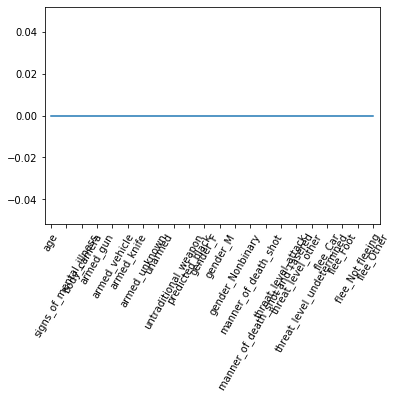

In [66]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0., normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()